In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
rf = pd.read_csv('data/rainfall.csv')

In [2]:
rf.head(5)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1,1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
2,1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
3,1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
4,1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


In [11]:
mean = rf['Jan'].mean()
var = rf['Jan'].var()
theta = var / mean
k = mean / theta

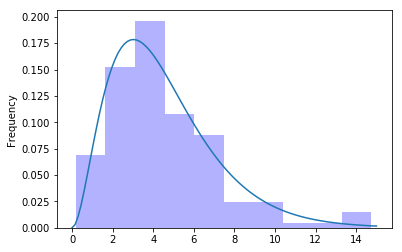

In [25]:
x = np.linspace(0,15,100)
y = scs.gamma.pdf(x, k, scale = theta)
plt.plot(x,y)
rf['Jan'].plot(kind='hist', normed = True, color = 'b', alpha = 0.3)
plt.show()

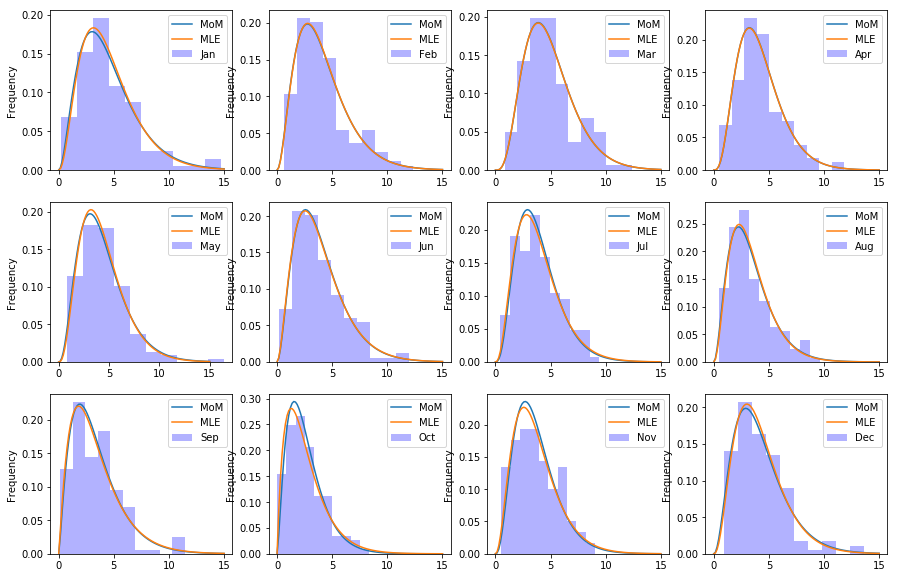

In [80]:
x = np.linspace(0,15,100)
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for mon, i in zip(rf.columns[1:],range(1,13)):
    mean = rf[mon].mean()
    var = rf[mon].var()
    theta = var / mean
    k = mean / theta
    
    y = scs.gamma.pdf(x, k, scale = theta)
    plt.subplot(3,4,i)
    plt.plot(x,y, label = 'MoM')
    
    ahat, loc, bhat = scs.gamma.fit(rf[mon], floc=0)
    y = scs.gamma.pdf(x, ahat, scale = bhat)
    plt.plot(x,y, label = 'MLE')
    
    rf[mon].plot(kind='hist', normed = True, color = 'b', alpha = 0.3)
    plt.legend()
plt.show()

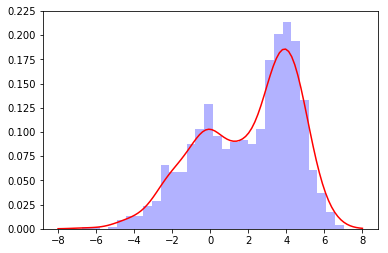

In [112]:
n1 = np.random.normal(0, 2, 500)
n2 = np.random.normal(4, 1, 500)
plt.hist(np.concatenate((n1,n2),axis = 0), normed = True, color = 'b', alpha = 0.3, bins = 30)

kde = scs.gaussian_kde(np.concatenate((n1,n2),axis = 0))
lrange = np.linspace(-8,8,100)
plt.plot(lrange,kde(lrange),'r') 

plt.show()

In [113]:
def likelihood(x, lam):
    scs.poisson.pmf(x,lam)

In [ ]:
p3 = np.loadtxt('data/poisson.txt')